# 6. 비지도 학습

## 6-1. 클러스터 알고리즘

- 클러스터링: 비슷한 샘플끼리 그룹으로 모으기

데이터 가져오기

In [7]:
import numpy as np
import matplotlib.pyplot as plt
fruits = np.load("fruits_300.npy")
print(fruits.shape)

(300, 100, 100)


이미지 출력하기

[  1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   2   1
   2   2   2   2   2   2   1   1   1   1   1   1   1   1   2   3   2   1
   2   1   1   1   1   2   1   3   2   1   3   1   4   1   2   5   5   5
  19 148 192 117  28   1   1   2   1   4   1   1   3   1   1   1   1   1
   2   2   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1]


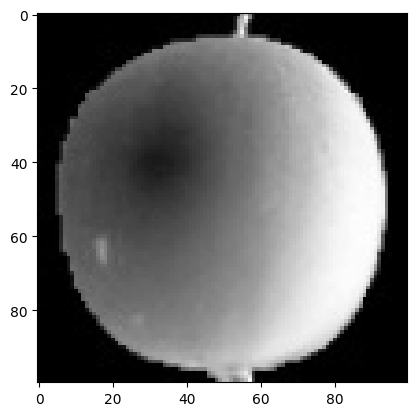

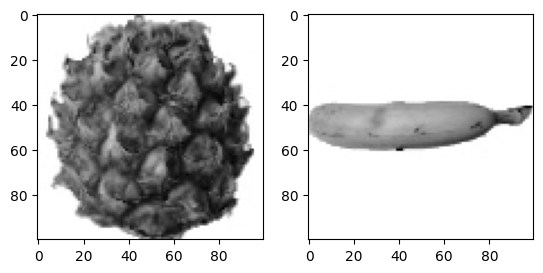

In [10]:
# 흑백 이미지 행렬값
print(fruits[0, 0, :])
# 흑백 이미지 출력
plt.imshow(fruits[0], cmap="gray")
# 컴퓨터는 밝은색(픽셀 값이 큼)에 주의를 기울이므로 값을 반전해줌
plt.show()

## 다른 이미지
fig, axs = plt.subplots(1, 2)
axs[0].imshow(fruits[100], cmap="gray_r")
axs[1].imshow(fruits[200], cmap="gray_r")
plt.show()

픽셀 값 분석하기

[ 88.3346  97.9249  87.3709  98.3703  92.8705  82.6439  94.4244  95.5999
  90.681   81.6226  87.0578  95.0745  93.8416  87.017   97.5078  87.2019
  88.9827 100.9158  92.7823 100.9184 104.9854  88.674   99.5643  97.2495
  94.1179  92.1935  95.1671  93.3322 102.8967  94.6695  90.5285  89.0744
  97.7641  97.2938 100.7564  90.5236 100.2542  85.8452  96.4615  97.1492
  90.711  102.3193  87.1629  89.8751  86.7327  86.3991  95.2865  89.1709
  96.8163  91.6604  96.1065  99.6829  94.9718  87.4812  89.2596  89.5268
  93.799   97.3983  87.151   97.825  103.22    94.4239  83.6657  83.5159
 102.8453  87.0379  91.2742 100.4848  93.8388  90.8568  97.4616  97.5022
  82.446   87.1789  96.9206  90.3135  90.565   97.6538  98.0919  93.6252
  87.3867  84.7073  89.1135  86.7646  88.7301  86.643   96.7323  97.2604
  81.9424  87.1687  97.2066  83.4712  95.9781  91.8096  98.4086 100.7823
 101.556  100.7027  91.6098  88.8976]


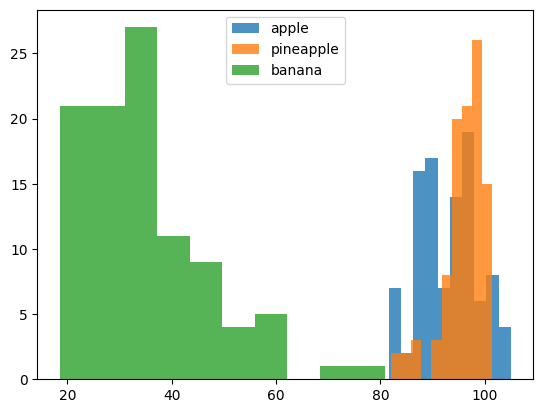

In [11]:
# 분석을 위해 1차원 배열로 변경하기
apple = fruits[0:100].reshape(-1, 100*100)
pineapple = fruits[100:200].reshape(-1, 100*100)
banana = fruits[200:300].reshape(-1, 100*100)

# 픽셀의 평균값 계산하기(샘플별)
print(apple.mean(axis=1))

# 픽셀의 평균값 시각화하기
plt.hist(np.mean(apple, axis=1), alpha=0.8)
plt.hist(np.mean(pineapple, axis=1), alpha=0.8)
plt.hist(np.mean(banana, axis=1), alpha=0.8)
plt.legend(["apple", "pineapple", "banana"])

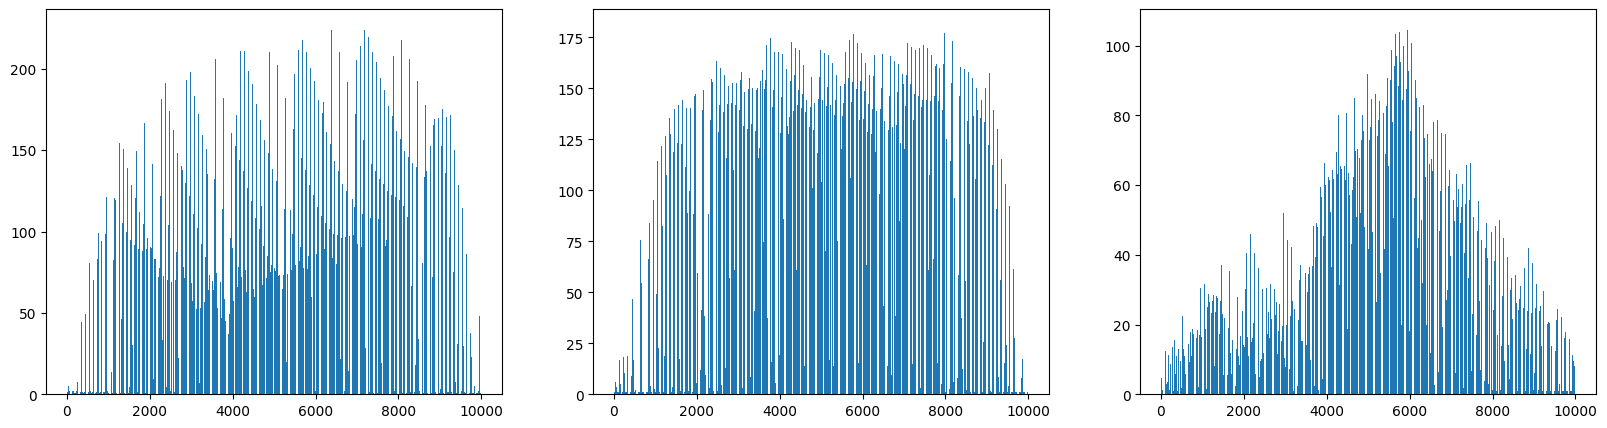

In [12]:
# 픽셀별 평균값 비교하기
fix, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].bar(range(10000), np.mean(apple, axis=0))
axs[1].bar(range(10000), np.mean(pineapple, axis=0))
axs[2].bar(range(10000), np.mean(banana, axis=0))
plt.show()

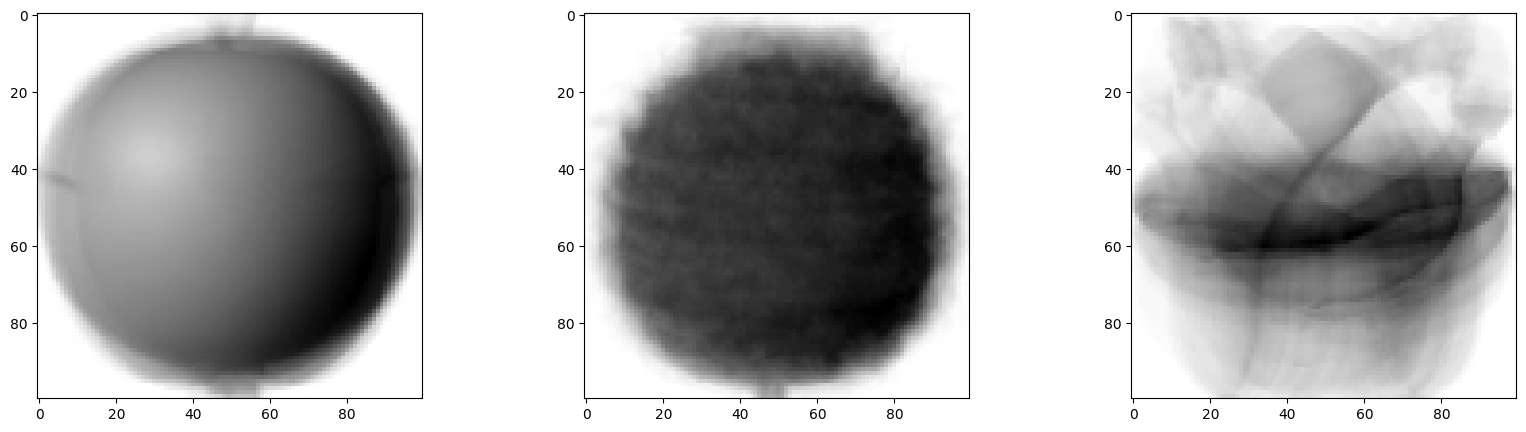

In [13]:
# 픽셀을 평균 낸 이미지
apple_mean = np.mean(apple, axis=0).reshape(100, 100)
pineapple_mean = np.mean(pineapple, axis=0).reshape(100, 100)
banana_mean = np.mean(banana, axis=0).reshape(100, 100)
fig, axs = plt.subplots(1, 3, figsize=(20, 5))
axs[0].imshow(apple_mean, cmap="gray_r")
axs[1].imshow(pineapple_mean, cmap="gray_r")
axs[2].imshow(banana_mean, cmap="gray_r")
plt.show()

평균값에 가까운 사진 고르기

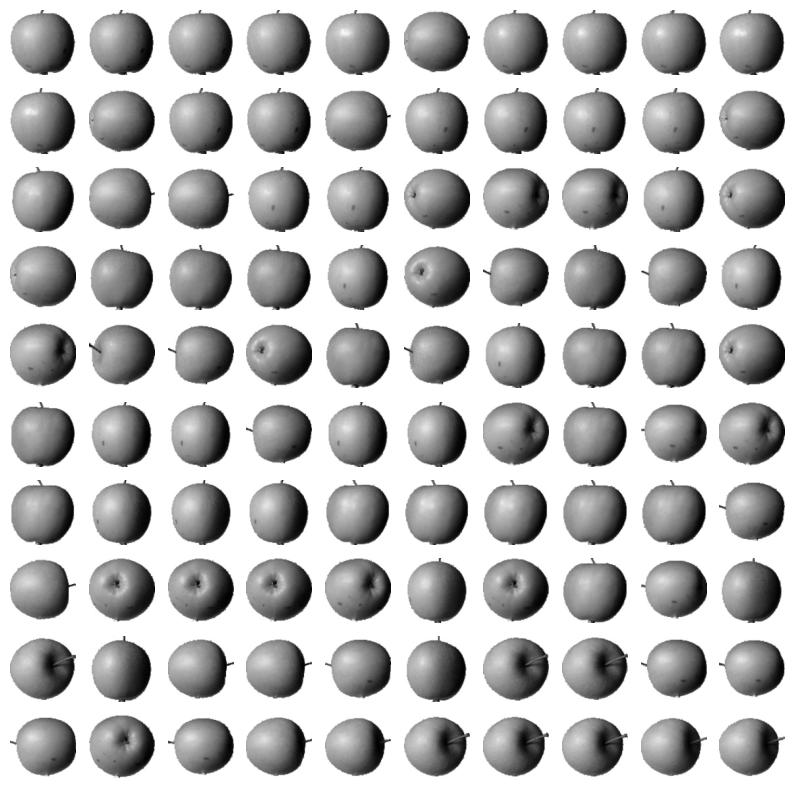

In [14]:
abs_diff = np.abs(fruits - apple_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

# apple_mean에 가장 가까운 과일 고르기
apple_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[apple_index[i*10+j]], cmap="gray_r")
        axs[i, j].axis("off")
plt.show()

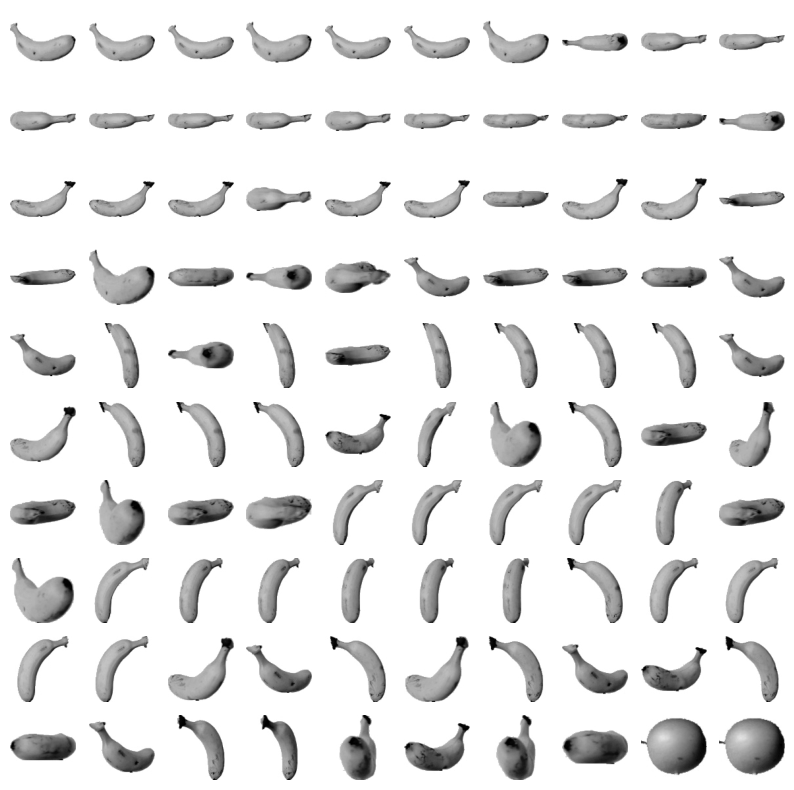

In [15]:
abs_diff = np.abs(fruits - banana_mean)
abs_mean = np.mean(abs_diff, axis=(1, 2))

# apple_mean에 가장 가까운 과일 고르기
banana_index = np.argsort(abs_mean)[:100]
fig, axs = plt.subplots(10, 10, figsize=(10, 10))
for i in range(10):
    for j in range(10):
        axs[i, j].imshow(fruits[banana_index[i*10+j]], cmap="gray_r")
        axs[i, j].axis("off")
plt.show()

## 6-2. k-means

### K-means 알고리즘

- 무작위로 k개 클러스터 중심을 고르기
- 각 샘플에서 가장 가까운 클러스터 중심을 찾아 해당 클러스터로 할당시키기
- 클러스터의 중심을 클러스터에 속한 샘플들의 평균값으로 변경하기
- 클러스터 중심이 수렴할 때까지 2~3 반복하기

In [16]:
# 데이터 가져오기
import numpy as np
fruits = np.load("fruits_300.npy")
fruits_2d = fruits.reshape(-1, 100*100)

In [17]:
# K-means 알고리즘
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=42)
km.fit(fruits_2d)

c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [19]:
print(km.labels_)
print(np.unique(km.labels_, return_counts=True))

[2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 0 2 0 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 2 0 0 2 2 2 2 2 2 2 2 0 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]
(array([0, 1, 2]), array([111,  98,  91], dtype=int64))


In [20]:
# 이미지 출력을 위한 유틸 함수
import matplotlib.pyplot as plt
def draw_fruits(arr, ratio=1):
    n = len(arr)
    rows = int(np.ceil(n/10))
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(
        rows, 
        cols, 
        figsize=(cols*ratio, rows*ratio),
        squeeze=False
    )
    for i in range(rows):
        for j in range(cols):
            if i * 10 + j < n:
                axs[i, j].imshow(arr[i*10+j], cmap="gray_r")
            axs[i, j].axis("off")
    plt.show()

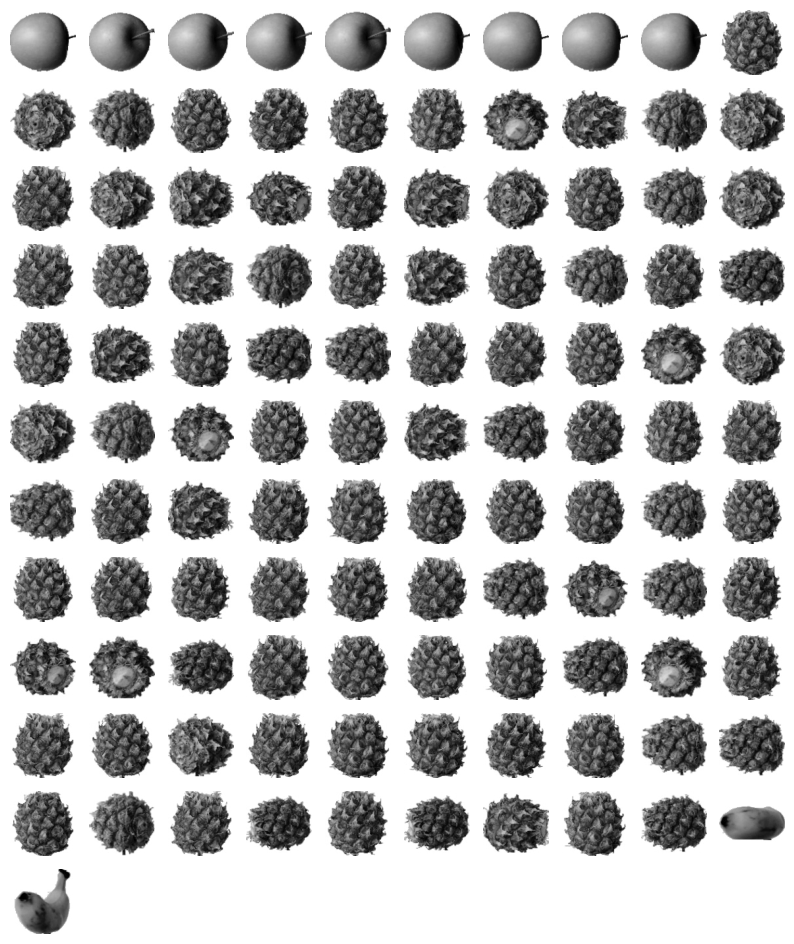

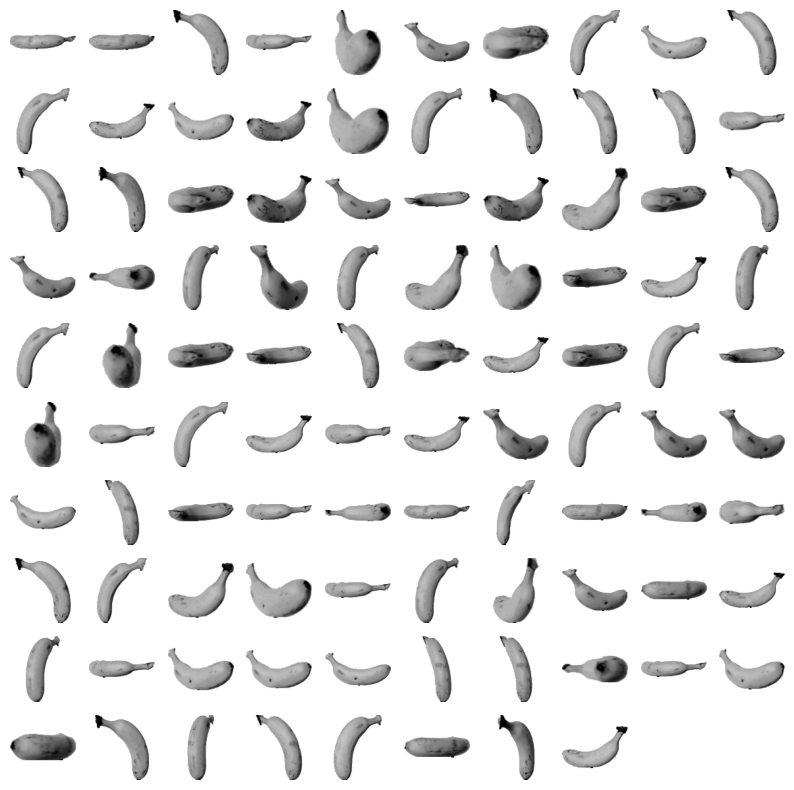

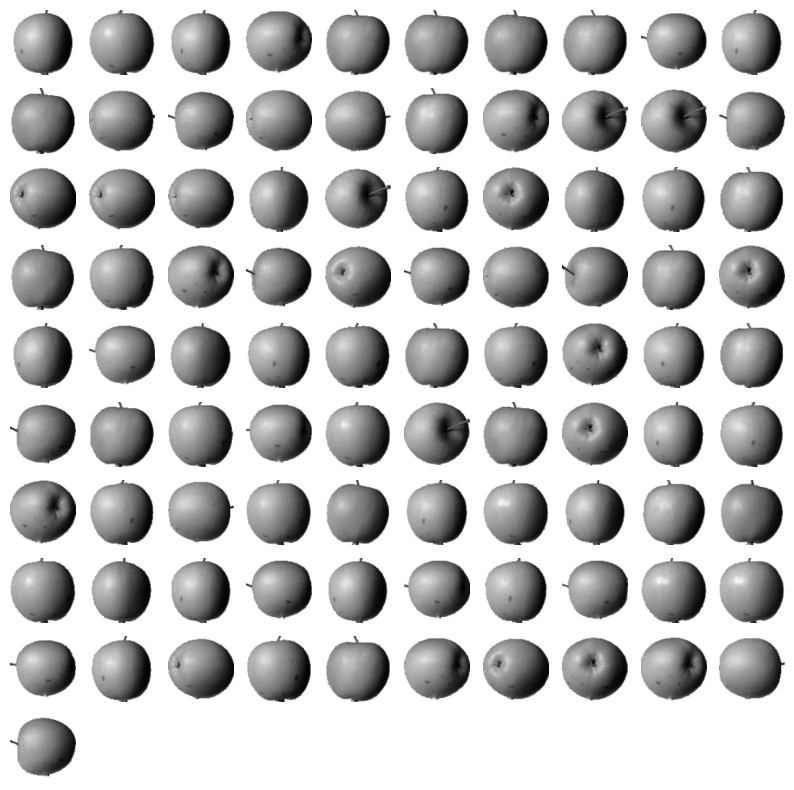

In [21]:
draw_fruits(fruits[km.labels_==0])
draw_fruits(fruits[km.labels_==1])
draw_fruits(fruits[km.labels_==2])

In [ ]:
# 클러스터의 중심
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

### 최적의 k 찾기

- 사전에 클러스터 개수를 지정해야 한다
- inertia 이너셔: 클러스터 중심과 샘플 사이의 거리의 제곱 합
- elbow 방법: 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾는 방법

c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\.venv\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default valu

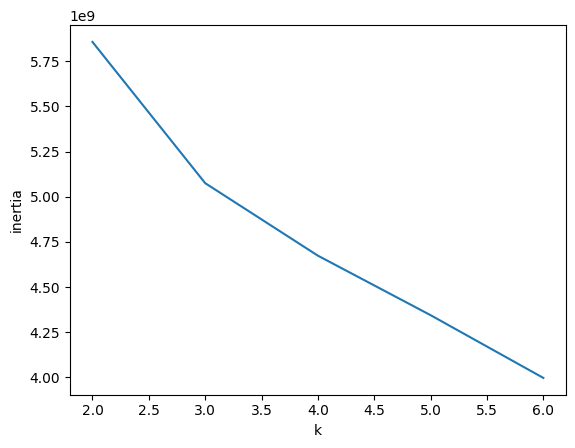

In [22]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)
plt.plot(range(2, 7), inertia)
plt.xlabel("k")
plt.ylabel("inertia")
plt.show()

## 6-3. 주성분 분석 PCA으로 차원 축소하기

차원, 차원 축소

PCA

PCA 클래스

원본 데이터 재구성

설명된 분산

다른 알고리즘과 함께 사용하기